# Name : Rohit Kulkarni USC ID : 5402749044

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn import cluster, datasets
import copy
from sklearn.cluster import SpectralClustering
import networkx as nx

In [76]:
columns = ["ID number","Diagnosis","Mean Radius","Mean Texture","Mean Perimeter","Mean Area","Mean Smoothness","Mean Compactness","Mean Concavity","Mean Concave Points","Mean Symmetry","Mean Fractal Dimension","Radius SE","Texture SE","Perimeter SE","Area SE","Smoothness SE","Compactness SE","Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE","Worst Radius","Worst Texture","Worst Perimeter","Worst Area","Worst Smoothness","Worst Compactness","Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractal Dimension"]
data = pd.read_csv("wdbc.data", names=columns, header=None)

In [77]:
positive = data.loc[data['Diagnosis'] == 'M'].reset_index()
negative = data.loc[data['Diagnosis'] == 'B'].reset_index()
positive = positive.drop(["index"],axis=1)
negative = negative.drop(["index"],axis=1)

1.b.i) Supervised Learning

In [123]:
test_error_total=[]
best_c=[]
accuracy_scores=[]
precision_scores=[]
f_scores=[]
recall_scores=[]
auc_values=[]

In [137]:
for i in range(0,30):
    p_Training_data,p_Test_data=train_test_split(positive,test_size=0.2,random_state=i)
    n_Training_data,n_Test_data=train_test_split(negative,test_size=0.2,random_state=i)
    full_Training=pd.concat([p_Training_data,n_Training_data])
    full_test=pd.concat([p_Test_data,n_Test_data])
    X_train=full_Training.iloc[:,2:32]
    Y_train=full_Training.iloc[:,1:2].values.ravel()
    X_test=full_test.iloc[:,2:32]
    Y_test=full_test.iloc[:,1:2].values.ravel()
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_nor=scaler.transform(X_train)
    scaler = MinMaxScaler()
    scaler.fit(X_test)
    X_test_nor=scaler.transform(X_test)
    C_range = np.logspace(-2,10,13)
    parameters_grid = dict(C=C_range)
    svc = svm.LinearSVC(penalty='l1',dual=False,max_iter=200000)
    cv=KFold(5)
    clf = GridSearchCV(svc,iid=False,param_grid=parameters_grid,cv=cv)
    clf.fit(X_train_nor, Y_train)
    y_pred = clf.predict(X_test_nor)
    score = round(clf.score(X_test_nor, Y_test),3)    
    best_c.append(clf.best_params_)
    test_error_total.append(score)
    accuracy_scores.append(accuracy_score(Y_test, y_pred))
    precision_scores.append(precision_score(Y_test,y_pred,average='micro'))
    recall_scores.append(recall_score(Y_test,y_pred,average='micro'))
    f_scores.append(f1_score(Y_test,y_pred,average='micro'))
    Y_test_binary=np.unique(Y_test, return_inverse=True)[1].tolist()
    Y_pred_binary=np.unique(y_pred, return_inverse=True)[1].tolist()
    fpr, tpr, thresholds = metrics.roc_curve(Y_test_binary, Y_pred_binary)
    auc_values.append(metrics.auc(fpr, tpr))

In [147]:
print("Test errors :",test_error_total)
print("Best C :",best_c)

Test errors : [0.878, 0.739, 0.835, 0.878, 0.765, 0.957, 0.852, 0.826, 0.957, 0.93, 0.93, 0.852, 0.922, 0.852, 0.939, 0.765, 0.896, 0.896, 0.722, 0.939, 0.765, 0.896, 0.896, 0.722, 0.939, 0.765, 0.896, 0.896, 0.722]
Best C : [{'C': 1000.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}]


In [148]:
accuracy_df = pd.DataFrame(data = accuracy_scores , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df.mean())

Average accuracy scores : Average Accuracy    0.856072
dtype: float64


In [149]:
precision_df = pd.DataFrame(data = precision_scores , columns=['Average Precision'])
print("Average precision scores :",precision_df.mean())

Average precision scores : Average Precision    0.856072
dtype: float64


In [150]:
recall_df = pd.DataFrame(data = recall_scores , columns=['Average Recall'])
print("Average recall scores :",recall_df.mean())

Average recall scores : Average Recall    0.856072
dtype: float64


In [151]:
f_df = pd.DataFrame(data = f_scores , columns=['Average F score'])
print("Average F scores :",f_df.mean())

Average F scores : Average F score    0.856072
dtype: float64


In [152]:
auc_df = pd.DataFrame(data = auc_values , columns=['Average AUC values'])
print("Average AUC scores :",auc_df.mean())

Average AUC scores : Average AUC values    0.880859
dtype: float64


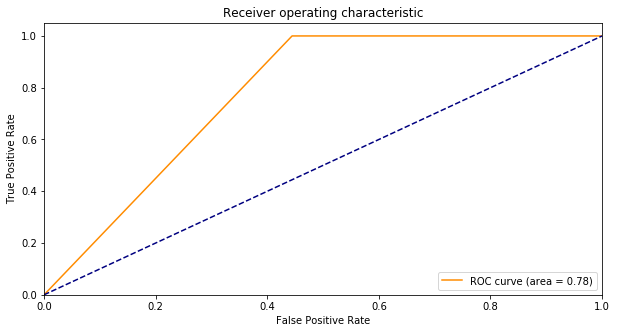

In [155]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [154]:
print ("Confusion Matrix")
confusion_matrix(Y_test, y_pred)

Confusion Matrix


array([[40, 32],
       [ 0, 43]], dtype=int64)

1.b.ii) Semi-Supervised Learning/ Self-training

1.b.ii.a) & 1.b.ii.b)

In [13]:
test_error_total1=[]
best_c1=[]
accuracy_scores1=[]
precision_scores1=[]
f_scores1=[]
recall_scores1=[]
auc_values1=[]
columns1=['Diagnosis']
columns2=["Mean Radius","Mean Texture","Mean Perimeter","Mean Area","Mean Smoothness","Mean Compactness","Mean Concavity","Mean Concave Points","Mean Symmetry","Mean Fractal Dimension","Radius SE","Texture SE","Perimeter SE","Area SE","Smoothness SE","Compactness SE","Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE","Worst Radius","Worst Texture","Worst Perimeter","Worst Area","Worst Smoothness","Worst Compactness","Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractal Dimension"]

In [156]:
for i in range(0,30):
    p_Labeling_data,p_Unlabel_data=train_test_split(positive,test_size=0.5,random_state=i)
    n_Labeling_data,n_Unlabel_data=train_test_split(negative,test_size=0.5,random_state=i)
    full_Labeling=pd.concat([p_Labeling_data,n_Labeling_data])
    full_unlabel=pd.concat([p_Unlabel_data,n_Unlabel_data])
    X_label=full_Labeling.iloc[:,2:32]
    Y_label=full_Labeling.iloc[:,1:2].values.ravel()
    X_unlabel=full_unlabel.iloc[:,2:32]
    Y_unlabel=full_unlabel.iloc[:,1:2].values.ravel()
    scaler = MinMaxScaler()
    scaler.fit(X_label)
    X_label_nor=scaler.transform(X_label)
    scaler = MinMaxScaler()
    scaler.fit(X_unlabel)
    X_unlabel_nor=scaler.transform(X_unlabel)
    C_range = np.logspace(-2,10,13)
    parameters_grid = dict(C=C_range)
    svc = svm.LinearSVC(penalty='l1',dual=False,max_iter=200000)
    cv=KFold(5)
    clf = GridSearchCV(svc,iid=False,param_grid=parameters_grid,cv=5)
    svc.fit(X_label_nor, Y_label)
    distance_from_margin = svc.decision_function(X_unlabel)
    distance_from_margin = list(distance_from_margin)
    distance_from_margin = [round(i,3) for i in distance_from_margin]
    distance_from_margin = map(abs, distance_from_margin)
    dist_df = pd.DataFrame(data = list(distance_from_margin) , columns=['distance'])
    Y_unlabel_df=pd.DataFrame(Y_unlabel,columns=['Diagnosis'])
    X_unlabel.reset_index(drop=True, inplace=True)
    dist_df.reset_index(drop=True, inplace=True)
    Y_unlabel_df.reset_index(drop=True, inplace=True)
    unlabel_data_dist = pd.concat([X_unlabel,Y_unlabel_df,dist_df], axis=1,)
    unlabel_data_dist_sorted = unlabel_data_dist.sort_values(['distance'], ascending=False)
    unlabel_data_sorted = unlabel_data_dist_sorted.drop('distance', axis=1)
    unlabel_data_sorted_train = unlabel_data_sorted.drop('Diagnosis',axis=1)
    X_label_nor_df=pd.DataFrame(X_label_nor,columns=columns2)
    Y_label_nor_df=pd.DataFrame(Y_label,columns=columns1)
    for row in unlabel_data_sorted_train.iterrows():
        x_test = unlabel_data_sorted_train.iloc[:1,:]
        svc = svm.LinearSVC(penalty='l1',dual=False,max_iter=200000)
        svc.fit(X_label_nor, Y_label)
        y_test = svc.predict(x_test)
        y_test=pd.DataFrame(y_test,columns=columns1)
        X_label_nor_df = pd.concat([X_label_nor_df,x_test],axis=0)
        Y_label_nor_df = pd.concat([Y_label_nor_df,y_test],axis=0)
        unlabel_data_sorted_train=unlabel_data_sorted_train.drop(unlabel_data_sorted_train.index[0])
    svc.fit(X_label_nor_df, Y_label_nor_df)
    clf.fit(X_label_nor_df, Y_label_nor_df)
    y_pred = svc.predict(X_unlabel_nor)
    score = round(clf.score(X_unlabel_nor, Y_unlabel),3)    
    best_c1.append(clf.best_params_)
    test_error_total1.append(score)
    accuracy_scores1.append(accuracy_score(Y_unlabel, y_pred))
    precision_scores1.append(precision_score(Y_unlabel,y_pred,average='micro'))
    recall_scores1.append(recall_score(Y_unlabel,y_pred,average='micro'))
    f_scores1.append(f1_score(Y_unlabel,y_pred,average='micro'))
    Y_unlabel_binary=np.unique(Y_unlabel, return_inverse=True)[1].tolist()
    Y_pred_binary=np.unique(y_pred, return_inverse=True)[1].tolist()
    fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_unlabel_binary, Y_pred_binary)
    auc_values1.append(metrics.auc(fpr1, tpr1))

In [157]:
print("Test errors :",test_error_total1)
print("Best C :",best_c1)

Test errors : [0.94, 0.944, 0.951, 0.937, 0.919, 0.947, 0.835, 0.958, 0.744, 0.972, 0.881, 0.923, 0.916, 0.874, 0.853, 0.898, 0.895, 0.961, 0.919, 0.972, 0.958, 0.965, 0.961, 0.853, 0.874, 0.874, 0.919, 0.919, 0.821, 0.965, 0.954, 0.916, 0.951, 0.926, 0.961, 0.94, 0.839]
Best C : [{'C': 10000.0}, {'C': 1.0}, {'C': 1000000.0}, {'C': 1.0}, {'C': 10000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 100.0}, {'C': 10.0}, {'C': 100000.0}, {'C': 100000.0}, {'C': 1.0}, {'C': 100000000.0}, {'C': 10.0}, {'C': 1.0}, {'C': 100000.0}, {'C': 1.0}, {'C': 1000000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10000000.0}, {'C': 10.0}, {'C': 10000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10000.0}, {'C': 1.0}, {'C': 100000.0}, {'C': 10000000000.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10000.0}]


In [158]:
accuracy_df1 = pd.DataFrame(data = accuracy_scores1 , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df1.mean())

Average accuracy scores : Average Accuracy    0.948601
dtype: float64


In [159]:
precision_df1 = pd.DataFrame(data = precision_scores1 , columns=['Average Precision'])
print("Average precision scores :",precision_df1.mean())

Average precision scores : Average Precision    0.948601
dtype: float64


In [160]:
recall_df1 = pd.DataFrame(data = recall_scores1 , columns=['Average Recall'])
print("Average recall scores :",recall_df1.mean())

Average recall scores : Average Recall    0.948601
dtype: float64


In [161]:
f_df1 = pd.DataFrame(data = f_scores1 , columns=['Average F score'])
print("Average F scores :",f_df1.mean())

Average F scores : Average F score    0.948601
dtype: float64


In [162]:
auc_df1 = pd.DataFrame(data = auc_values1 , columns=['Average AUC values'])
print("Average AUC scores :",auc_df1.mean())

Average AUC scores : Average AUC values    0.941665
dtype: float64


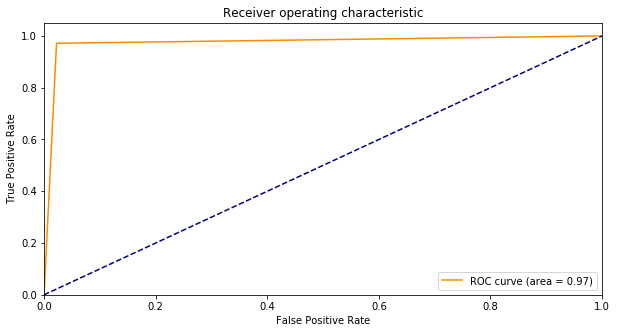

In [163]:
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [164]:
print ("Confusion Matrix")
confusion_matrix(Y_unlabel, y_pred)

Confusion Matrix


array([[175,   4],
       [  3, 103]], dtype=int64)

1.b.iii) Unsupervised Learning

In [23]:
test_error_total2=[]
best_c2=[]
accuracy_scores2=[]
precision_scores2=[]
f_scores2=[]
recall_scores2=[]
auc_values2=[]

In [24]:
test_error_total3=[]
best_c3=[]
accuracy_scores3=[]
precision_scores3=[]
f_scores3=[]
recall_scores3=[]
auc_values3=[]

In [81]:
for i in range(0,30):
    p_Training_data,p_Test_data=train_test_split(positive,test_size=0.2,random_state=i)
    n_Training_data,n_Test_data=train_test_split(negative,test_size=0.2,random_state=i)
    full_Training=pd.concat([p_Training_data,n_Training_data])
    full_test=pd.concat([p_Test_data,n_Test_data])
    X_train=full_Training.iloc[:,2:32]
    Y_train=full_Training.iloc[:,1:2]
    k_means = KMeans(n_clusters=2, n_init=50)
    k_means.fit(X_train)
    cluster_indices = {i: np.where(k_means.labels_ == i)[0] for i in range(k_means.n_clusters)}
    indexes_cluster1 = list(cluster_indices[0])
    indexes_cluster2 = list(cluster_indices[1])
    dist_from_centers = k_means.transform(X_train)
    dist_from_centers_df = pd.DataFrame(data=dist_from_centers,columns=['C1','C2'])
    dist_from_centers_df = dist_from_centers_df.sort_values(['C1'], ascending=[1])
    dist_from_center1 = dist_from_centers_df.drop('C2',axis=1)
    dist_from_center2_to_be = dist_from_centers_df['C2']
    dist_from_center2 = dist_from_center2_to_be.to_frame()
    dist_from_center2 = dist_from_center2.sort_values(['C2'], ascending=[1])
    closest_30_C1 = dist_from_center1.iloc[:30,:]
    closest_30_C2 = dist_from_center2.iloc[:30,:]
    indexes_1 = closest_30_C1.index.tolist()
    indexes_2 = closest_30_C2.index.tolist()
    Y_train.reset_index(drop=True, inplace=True)
    K_means_ylabel_c1 = Y_train.iloc[indexes_1]
    K_means_ylabel_c2 = Y_train.iloc[indexes_2]
    c1_label = K_means_ylabel_c1['Diagnosis'].value_counts().idxmax()
    c2_label = K_means_ylabel_c2['Diagnosis'].value_counts().idxmax()
    Y_train.reset_index(drop=True, inplace=True)
    y_pred=copy.deepcopy(Y_train)
    y_pred.iloc[indexes_cluster1] = c1_label
    y_pred.iloc[indexes_cluster2] = c2_label
    accuracy_scores2.append(accuracy_score(Y_train, y_pred))
    precision_scores2.append(precision_score(Y_train,y_pred,average='micro'))
    recall_scores2.append(recall_score(Y_train,y_pred,average='micro'))
    f_scores2.append(f1_score(Y_train,y_pred,average='micro'))
    Y_unlabel_binary=np.unique(Y_train, return_inverse=True)[1].tolist()
    Y_pred_binary=np.unique(y_pred, return_inverse=True)[1].tolist()
    fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_unlabel_binary, Y_pred_binary)
    auc_values2.append(metrics.auc(fpr2, tpr2))
    X_test=full_test.iloc[:,2:32]
    Y_test=full_test.iloc[:,1:2].values.ravel()
    dist_from_centers_test = k_means.transform(X_test)
    dist_from_centers_df_test = pd.DataFrame(data=dist_from_centers_test,columns=['Cluster1','Cluster2'])
    labels = dist_from_centers_df_test.apply(lambda x: x.argmin(), axis=1)
    columns3 = ['Diagnosis']
    labels_df = pd.DataFrame(labels,columns=columns3)
    pred_labels_1 = labels_df['Diagnosis'].replace({'Cluster1':c1_label,'Cluster2':c2_label})
    pred_labels = pred_labels_1.to_frame()
    accuracy_scores3.append(accuracy_score(Y_test, pred_labels))
    precision_scores3.append(precision_score(Y_test,pred_labels,average='micro'))
    recall_scores3.append(recall_score(Y_test,pred_labels,average='micro'))
    f_scores3.append(f1_score(Y_test,pred_labels,average='micro'))
    Y_unlabel_binary1=np.unique(Y_test, return_inverse=True)[1].tolist()
    Y_pred_binary1=np.unique(pred_labels, return_inverse=True)[1].tolist()
    fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_unlabel_binary1, Y_pred_binary1)
    auc_values3.append(metrics.auc(fpr3, tpr3))

In [82]:
accuracy_df2 = pd.DataFrame(data = accuracy_scores2 , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df2.mean())

Average accuracy scores : Average Accuracy    0.849717
dtype: float64


In [83]:
precision_df2 = pd.DataFrame(data = precision_scores2 , columns=['Average Precision'])
print("Average precision scores :",precision_df2.mean())

Average precision scores : Average Precision    0.849717
dtype: float64


In [84]:
recall_df2 = pd.DataFrame(data = recall_scores2 , columns=['Average Recall'])
print("Average recall scores :",recall_df2.mean())

Average recall scores : Average Recall    0.849717
dtype: float64


In [85]:
f_df2 = pd.DataFrame(data = f_scores2 , columns=['Average F score'])
print("Average F scores :",f_df2.mean())

Average F scores : Average F score    0.849717
dtype: float64


In [86]:
auc_df2 = pd.DataFrame(data = auc_values2 , columns=['Average AUC values'])
print("Average AUC scores :",auc_df2.mean())

Average AUC scores : Average AUC values    0.799
dtype: float64


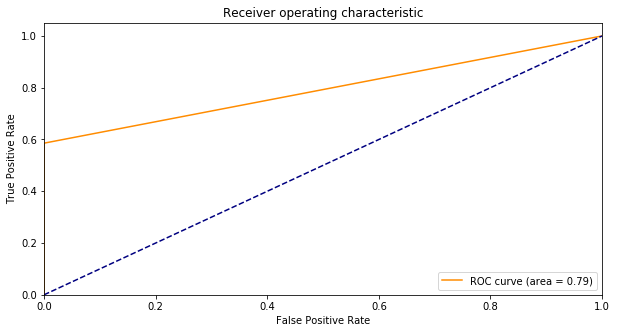

In [87]:
plt.figure(figsize=(10,5))
plt.plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [88]:
print ("Confusion Matrix")
confusion_matrix(Y_train, y_pred)

Confusion Matrix


array([[285,   0],
       [ 70,  99]], dtype=int64)

In [89]:
accuracy_df3 = pd.DataFrame(data = accuracy_scores3 , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df3.mean())

Average accuracy scores : Average Accuracy    0.850683
dtype: float64


In [90]:
precision_df3 = pd.DataFrame(data = precision_scores3 , columns=['Average Precision'])
print("Average precision scores :",precision_df3.mean())

Average precision scores : Average Precision    0.850683
dtype: float64


In [91]:
recall_df3 = pd.DataFrame(data = recall_scores3 , columns=['Average Recall'])
print("Average recall scores :",recall_df3.mean())

Average recall scores : Average Recall    0.850683
dtype: float64


In [92]:
f_df3 = pd.DataFrame(data = f_scores3 , columns=['Average F score'])
print("Average F scores :",f_df3.mean())

Average F scores : Average F score    0.850683
dtype: float64


In [93]:
auc_df3 = pd.DataFrame(data = auc_values3 , columns=['Average AUC values'])
print("Average AUC scores :",auc_df3.mean())

Average AUC scores : Average AUC values    0.801403
dtype: float64


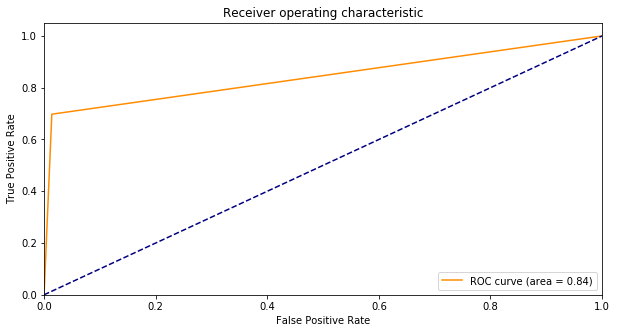

In [139]:
plt.figure(figsize=(10,5))
plt.plot(fpr3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr3, tpr3))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
print ("Confusion Matrix")
confusion_matrix(Y_test, pred_labels)

Confusion Matrix


array([[71,  1],
       [13, 30]], dtype=int64)

1.b.iv) Spectral Clustering

In [173]:
test_error_total4=[]
best_c4=[]
accuracy_scores4=[]
precision_scores4=[]
f_scores4=[]
recall_scores4=[]
auc_values4=[]

In [174]:
test_error_total5=[]
best_c5=[]
accuracy_scores5=[]
precision_scores5=[]
f_scores5=[]
recall_scores5=[]
auc_values5=[]

In [175]:
for i in range(0,30):    
    p_Training_data,p_Test_data=train_test_split(positive,test_size=0.2,random_state=i)
    n_Training_data,n_Test_data=train_test_split(negative,test_size=0.2,random_state=i)
    full_Training=pd.concat([p_Training_data,n_Training_data])
    full_test=pd.concat([p_Test_data,n_Test_data])
    X_train=full_Training.iloc[:,2:32]
    Y_train=full_Training.iloc[:,1:2]
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_nor=scaler.transform(X_train)
    clustering=SpectralClustering(n_clusters=2,n_init=50,gamma=1,affinity='rbf')
    y_pred=clustering.fit_predict(X_train_nor)
    cluster_0=[]
    cluster_1=[] 
    count=0
    for i in y_pred:
        if i == 0:
            cluster_0.append(count)
            count=count+1
        else:
            cluster_1.append(count)
            count=count+1                    
    Y_train.reset_index(drop=True, inplace=True)
    spectralclustering_ylabel_c1 = Y_train.iloc[cluster_0]
    spectralclustering_ylabel_c2 = Y_train.iloc[cluster_1]
    c1_label = spectralclustering_ylabel_c1['Diagnosis'].value_counts().idxmax()
    c2_label = spectralclustering_ylabel_c2['Diagnosis'].value_counts().idxmax()
    y_pred=copy.deepcopy(Y_train)
    y_pred.iloc[cluster_0] = c1_label
    y_pred.iloc[cluster_1] = c2_label
    columns4 = ['Diagnosis']
    labels_df = pd.DataFrame(y_pred,columns=columns4)
    pred_labels_1 = labels_df['Diagnosis'].replace({'Cluster1':c1_label,'Cluster2':c2_label})
    pred_labels = pred_labels_1.to_frame()
    accuracy_scores4.append(accuracy_score(Y_train, pred_labels))
    precision_scores4.append(precision_score(Y_train,pred_labels,average='micro'))
    recall_scores4.append(recall_score(Y_train,pred_labels,average='micro'))
    f_scores4.append(f1_score(Y_train,pred_labels,average='micro'))
    Y_unlabel_binary2=np.unique(Y_train, return_inverse=True)[1].tolist()
    Y_pred_binary2=np.unique(pred_labels, return_inverse=True)[1].tolist()
    fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_unlabel_binary2, Y_pred_binary2)
    auc_values4.append(metrics.auc(fpr4, tpr4))
    
    X_test=full_test.iloc[:,2:32]
    Y_test=full_test.iloc[:,1:2]
    scaler = MinMaxScaler()
    scaler.fit(X_test)
    X_test_nor=scaler.transform(X_test)
    clustering=SpectralClustering(n_clusters=2,n_init=50,gamma=1,affinity='rbf')
    y_pred_test=clustering.fit_predict(X_test_nor)
    cluster_0_test=[]
    cluster_1_test=[] 
    count=0
    for i in y_pred_test:
        if i == 0:
            cluster_0_test.append(count)
            count=count+1
        else:
            cluster_1_test.append(count)
            count=count+1                    
    Y_test.reset_index(drop=True, inplace=True)
    spectralclustering_ylabel_c1_test = Y_test.iloc[cluster_0_test]
    spectralclustering_ylabel_c2_test = Y_test.iloc[cluster_1_test]
    c1_label_test = spectralclustering_ylabel_c1_test['Diagnosis'].value_counts().idxmax()
    c2_label_test = spectralclustering_ylabel_c2_test['Diagnosis'].value_counts().idxmax()
    y_pred_test=copy.deepcopy(Y_test)
    y_pred_test.iloc[cluster_0_test] = c1_label_test
    y_pred_test.iloc[cluster_1_test] = c2_label_test
    columns5 = ['Diagnosis']
    labels_df_test = pd.DataFrame(y_pred_test,columns=columns5)
    pred_labels_1_test = labels_df_test['Diagnosis'].replace({'Cluster1':c1_label,'Cluster2':c2_label})
    pred_labels_test = pred_labels_1_test.to_frame()
    accuracy_scores5.append(accuracy_score(Y_test, pred_labels_test))
    precision_scores5.append(precision_score(Y_test,pred_labels_test,average='micro'))
    recall_scores5.append(recall_score(Y_test,pred_labels_test,average='micro'))
    f_scores5.append(f1_score(Y_test,pred_labels_test,average='micro'))
    Y_unlabel_binary3=np.unique(Y_test, return_inverse=True)[1].tolist()
    Y_pred_binary3=np.unique(pred_labels_test, return_inverse=True)[1].tolist()
    fpr5, tpr5, thresholds5 = metrics.roc_curve(Y_unlabel_binary3, Y_pred_binary3)
    auc_values5.append(metrics.auc(fpr5, tpr5))

In [99]:
accuracy_df4 = pd.DataFrame(data = accuracy_scores4 , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df4.mean())

Average accuracy scores : Average Accuracy    0.856681
dtype: float64


In [100]:
precision_df4 = pd.DataFrame(data = precision_scores4 , columns=['Average Precision'])
print("Average precision scores :",precision_df4.mean())

Average precision scores : Average Precision    0.856681
dtype: float64


In [101]:
recall_df4 = pd.DataFrame(data = recall_scores4 , columns=['Average Recall'])
print("Average recall scores :",recall_df4.mean())

Average recall scores : Average Recall    0.856681
dtype: float64


In [102]:
f_df4 = pd.DataFrame(data = f_scores4 , columns=['Average F score'])
print("Average F scores :",f_df4.mean())

Average F scores : Average F score    0.856681
dtype: float64


In [103]:
auc_df4 = pd.DataFrame(data = auc_values4 , columns=['Average AUC values'])
print("Average AUC scores :",auc_df4.mean())

Average AUC scores : Average AUC values    0.809743
dtype: float64


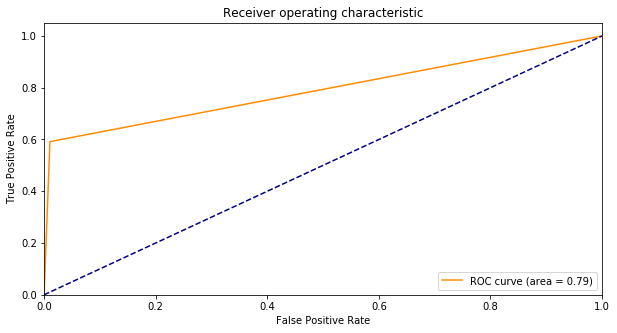

In [104]:
plt.figure(figsize=(10,5))
plt.plot(fpr4, tpr4, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr4, tpr4))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [105]:
print ("Confusion Matrix")
confusion_matrix(Y_train, pred_labels)

Confusion Matrix


array([[282,   3],
       [ 69, 100]], dtype=int64)

In [176]:
accuracy_df5 = pd.DataFrame(data = accuracy_scores5 , columns=['Average Accuracy'])
print("Average accuracy scores :",accuracy_df5.mean())

Average accuracy scores : Average Accuracy    0.825217
dtype: float64


In [177]:
precision_df5 = pd.DataFrame(data = precision_scores5 , columns=['Average Precision'])
print("Average precision scores :",precision_df5.mean())

Average precision scores : Average Precision    0.825217
dtype: float64


In [178]:
recall_df5 = pd.DataFrame(data = recall_scores5 , columns=['Average Recall'])
print("Average recall scores :",recall_df5.mean())

Average recall scores : Average Recall    0.825217
dtype: float64


In [179]:
f_df5 = pd.DataFrame(data = f_scores5 , columns=['Average F score'])
print("Average F scores :",f_df5.mean())

Average F scores : Average F score    0.825217
dtype: float64


In [180]:
auc_df5 = pd.DataFrame(data = auc_values5 , columns=['Average AUC values'])
print("Average AUC scores :",auc_df5.mean())

Average AUC scores : Average AUC values    0.76784
dtype: float64


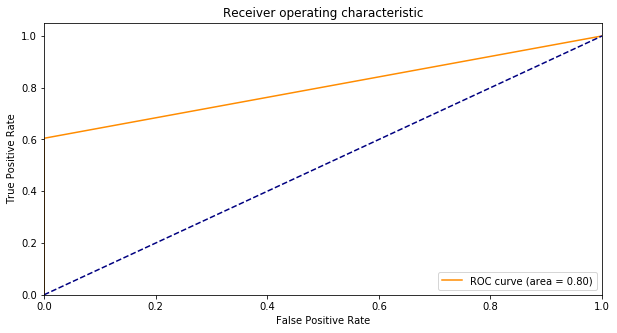

In [181]:
plt.figure(figsize=(10,5))
plt.plot(fpr5, tpr5, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr5, tpr5))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [182]:
print ("Confusion Matrix")
confusion_matrix(Y_test, pred_labels_test)

Confusion Matrix


array([[72,  0],
       [17, 26]], dtype=int64)

2. Active Learning Using Support Vector Machines

a) Dividing the data set into 472 data points randomly as the test set, and the remaining 900 points as the training set.

In [57]:
columns=["Variance","Skewness","Curtosis","Entropy","Class"]
auth_data=pd.read_csv("data_banknote_authentication.txt",names=columns,header=None)
Training_data,Test_data=train_test_split(auth_data,test_size=0.344,random_state=42)

b.i) 50 errors for 90 SVMs per each procedure for passive learning

Running the code for 5 errors for 9 SVMs as it is long time for 50 and 90 times

In [212]:
bn_train_new=pd.DataFrame()
test_error_total_passive = []
for i in range(0,5):
    test_error_passive = []
    best_penality_parameter_passive = []
    for j in range(0,9):
        bn_train_extracted = Training_data.sample(n=10,replace=False)
        bn_train_new =pd.concat([bn_train_new, bn_train_extracted], axis=0)
        X_train = bn_train_new.drop('Class', axis=1)
        Y_train1 = bn_train_new['Class']
        Y_train = Y_train1.ravel();
        x_test = Test_data.drop('Class', axis=1)
        y_test1 = Test_data['Class']
        y_test = y_test1.ravel();
        C_range = np.logspace(-2,10,13)
        parameters_grid = dict(C=C_range)
        svc = svm.LinearSVC(penalty='l1',dual=False,max_iter=150000)
        cv=KFold(10)
        clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(x_test)
        score = round(clf.score(x_test, y_test),3)
        best_penality_parameter_passive.append(clf.best_params_)
        test_error_passive.append(score)
    test_error_total_passive.append(test_error_passive)

In [213]:
print("Test errors :",test_error_total_passive)
print("Best C :",best_penality_parameter_passive)

Test errors : [[0.864, 0.858, 0.845, 0.992, 0.983, 0.985, 0.989, 0.989, 0.994], [0.989, 0.989, 0.989, 0.992, 0.989, 0.992, 0.992, 0.989, 0.989], [0.989, 0.994, 0.994, 0.994, 0.987, 0.987, 0.987, 0.987, 0.987], [0.987, 0.987, 0.989, 0.987, 0.989, 0.987, 0.987, 0.987, 0.987], [0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987]]
Best C : [{'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}]


b.ii) 50 errors for 90 SVMs per each procedure for active learning

In [214]:
X_train_full = Training_data.drop('Class', axis=1)
Y_train1 = Training_data['Class']
Y_train_full = Y_train1.to_frame();
x_test_full = Test_data.drop('Class', axis=1)
y_test1 = Test_data['Class']
y_test_full = y_test1.to_frame();

In [215]:
clf = svm.LinearSVC(penalty='l1',dual=False,max_iter=10000)
clf.fit(X_train_full, Y_train_full)
distance_from_margin = clf.decision_function(X_train_full)
distance_from_margin = list(distance_from_margin)
distance_from_margin = [round(i,3) for i in distance_from_margin]
distance_from_margin = list(map(abs, distance_from_margin))

In [216]:
dist_df = pd.DataFrame(data = distance_from_margin , columns=['distance'])
test_error_total_passive=pd.DataFrame(test_error_total_passive)
avg_passive=test_error_total_passive.mean(axis=1)
test_error_total_passive=test_error_total_passive.mean()
test_error_total_passive= test_error_total_passive.values.tolist()

In [64]:
X_train_full.reset_index(drop=True, inplace=True)
Y_train_full.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)

In [65]:
X_train_new = pd.concat([X_train_full,Y_train_full,dist_df], axis=1,)
X_train_dist = X_train_new.sort_values(['distance'], ascending=[1])
X_train_sorted = X_train_dist.drop('distance', axis=1)

In [66]:
auth_train_10 = X_train_sorted.sample(n=10,replace=False)
auth_train_rem = X_train_sorted[~X_train_sorted.index.isin(auth_train_10.index)]

Running the code for 5 errors for 9 SVMs as it is long time for 50 and 90 times

In [197]:
bn_train_new=pd.DataFrame()
test_error_total_active = []
bn_train_extracted = auth_train_10
for i in range(0,5):
    test_error_active = []
    best_penality_parameter_active = []
    for j in range(1,10):
        bn_train_new =pd.concat([bn_train_new, bn_train_extracted], axis=0)
        X_train = bn_train_new.drop('Class', axis=1)
        Y_train1 = bn_train_new['Class']
        Y_train = Y_train1.ravel();
        x_test = Test_data.drop('Class', axis=1)
        y_test1 = Test_data['Class']
        y_test = y_test1.ravel();
        C_range = np.logspace(-2,10,13)
        parameters_grid = dict(C=C_range)
        svc = svm.LinearSVC(penalty='l1',dual=False,max_iter=150000)
        cv=KFold(10)
        clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(x_test)
        score = round(clf.score(x_test, y_test),3) 
        best_penality_parameter_active.append(clf.best_params_)
        test_error_active.append(score)    
        bn_train_extracted = auth_train_rem.iloc[:10,:]
        auth_train_rem=auth_train_rem.drop(auth_train_rem.index[:10])
    test_error_total_active.append(test_error_active)    

In [198]:
print("Test errors :",test_error_total_active)
print("Best C :",best_penality_parameter_active)

Test errors : [[0.975, 0.888, 0.975, 0.915, 0.917, 0.979, 0.919, 0.924, 0.924], [0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979], [0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979], [0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979], [0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979]]
Best C : [{'C': 10000.0}, {'C': 1000.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 10000.0}, {'C': 100000.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}]


In [210]:
test_error_total_active=pd.DataFrame(test_error_total_active)
avg_active=test_error_total_active.mean(axis=1)
test_error_total_active=test_error_total_active.mean()
test_error_total_active= test_error_total_active.values.tolist()

In [217]:
print("Average of 50 errors from passive learning",avg_passive)
print("Average of 50 errors from active learning",avg_active)

Average of 50 errors from passive learning 0    0.944333
1    0.990000
2    0.989556
3    0.987444
4    0.987000
dtype: float64
Average of 50 errors from active learning 0    0.935111
1    0.979000
2    0.979000
3    0.979000
4    0.979000
dtype: float64


In [71]:
length=len(test_error_total_active)
no_of_train_inst = [i*10 for i in range (1,length+1)]

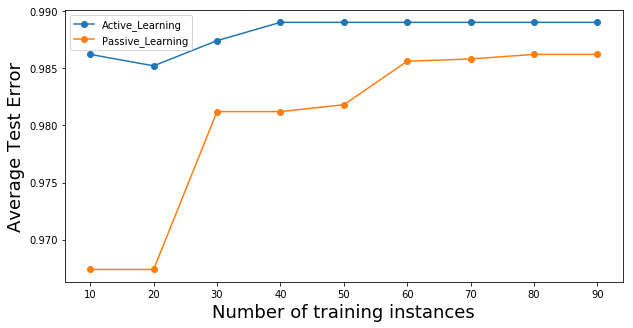

In [74]:
plt.figure(figsize=(10,5))
plt.xlabel('Number of training instances', fontsize=18)
plt.ylabel('Average Test Error', fontsize=18)
plt.plot(no_of_train_inst, test_error_total_active,marker='o',label='Active_Learning')
plt.plot(no_of_train_inst, test_error_total_passive,marker='o',label='Passive_Learning')
plt.legend(loc='best')
plt.show()